# Get metadata, show an image

In [1]:
import javabridge
import bioformats
javabridge.start_vm(class_path=bioformats.JARS)

In [2]:
import os

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import bioformats.formatreader as format_reader
import random

%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['image.cmap'] = 'gray'

In [3]:
def img_read(self, x=0, y=0, z=0, width=1000, height=1000):
    img_path = self
    ImageReader = format_reader.make_image_reader_class()
    reader = ImageReader()
    reader.setId(img_path)
    img = reader.openBytesXYWH(z, x, y, width, height)
    img.shape = (height, width, 3)

    return img  

In [6]:
# ndpi image path
img_path = '/home/jovyan/work/data/PAL1999/C3/PAL1999_C3_sample22_slide1 - 2022-10-11 21.57.44.ndpi'

In [7]:
omexml = bioformats.get_omexml_metadata(img_path)

21:50:13.630 [Thread-0] DEBUG loci.common.NIOByteBufferProvider - Using mapped byte buffer? false
21:50:13.662 [Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.URLReader
java.lang.ClassNotFoundException: loci.formats.in.URLReader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:418)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:351)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:264)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
21:50:13.667 [Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.SlideBook6Reader
java.lang.ClassNotFoundException: loci.formats.in.SlideBook6Reader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	at java.lan

In [8]:
b = bioformats.OMEXML(xml=omexml)

In [9]:
print(b)

<ome:OME xmlns:ome="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd"><ome:Instrument ID="Instrument:0"><ome:Microscope Model="C9600-12" /><ome:Objective ID="Objective:0:0" NominalMagnification="40.0" /></ome:Instrument><ome:Image ID="Image:0" Name="Series 1"><ome:AcquisitionDate>2022-10-11T21:58:09</ome:AcquisitionDate><ome:Description>120187</ome:Description><ome:InstrumentRef ID="Instrument:0" /><ome:ObjectiveSettings ID="Objective:0:0" /><ome:Pixels BigEndian="false" DimensionOrder="XYCZT" ID="Pixels:0" Interleaved="true" PhysicalSizeX="0.22507314877335133" PhysicalSizeXUnit="µm" PhysicalSizeY="0.22507314877335133" PhysicalSizeYUnit="µm" SignificantBits="8" SizeC="3" SizeT="1" SizeX="67456" SizeY="51968" SizeZ="9" Type="uint8"><ome:Channel ID="Channel:0:0" SamplesPerPixel="3"><ome:LightPath /></ome:Ch

In [10]:
metadata = {}
calibration = b.image().Pixels.PhysicalSizeX
calibration_unit = b.image().Pixels.PhysicalSizeXUnit
width = b.image().Pixels.SizeX
height = b.image().Pixels.SizeY
zPlane = b.image().Pixels.SizeZ

metadata.update({'calibration': calibration})
metadata.update({'calibration_unit': calibration_unit})
metadata.update({'width': width})
metadata.update({'height': height})
metadata.update({'zPlane': zPlane})
print(metadata)

{'calibration': 0.22507314877335133, 'calibration_unit': 'µm', 'width': 67456, 'height': 51968, 'zPlane': 9}


0
0 16384
22:07:01.537 [Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.URLReader
java.lang.ClassNotFoundException: loci.formats.in.URLReader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:418)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:351)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:264)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
22:07:01.537 [Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.SlideBook6Reader
java.lang.ClassNotFoundException: loci.formats.in.SlideBook6Reader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:418)
	at sun.misc.Launcher$AppClassLoader.loadC

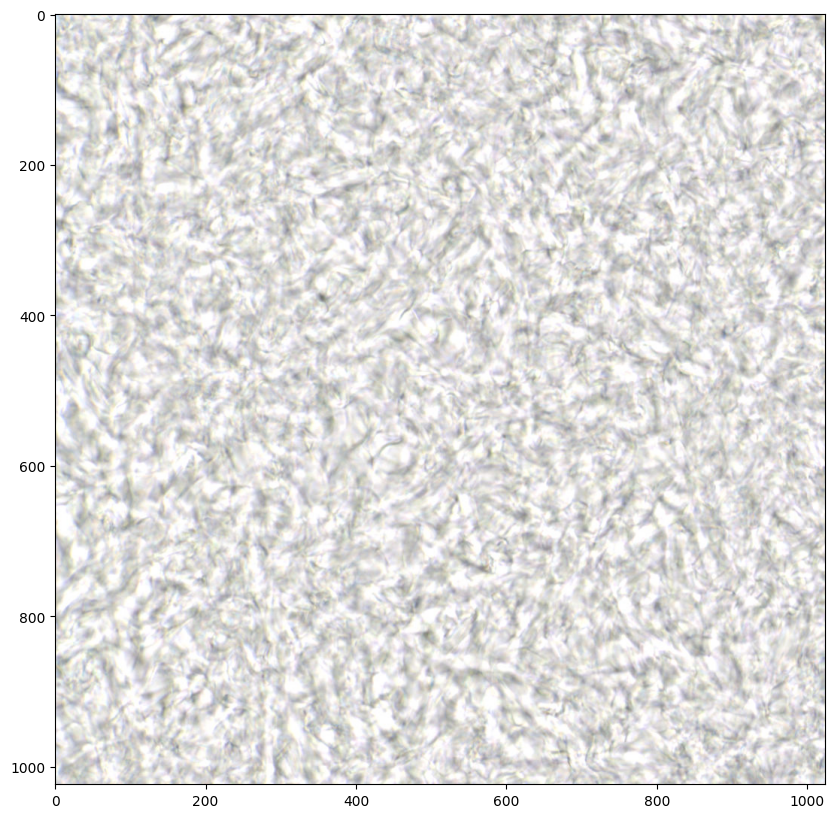

In [33]:
# Display a random large crop 
width = 1024
height = 1024

start_x_list = np.arange(0, metadata['width'] - width, width).tolist()
start_y_list = np.arange(0, metadata['height'] - height, height).tolist()

x = random.choice(start_x_list)
y = random.choice(start_y_list)
z = 3

img = img_read(img_path, x=x, y=y, z=z, width = 1024, height = 1024).astype(np.float64)
im = Image.fromarray(img)
# im.save(os.path.join(str(x) + 'x_' + str(y) + 'y_' + str(z) + 'z.png'))

img = cv2.normalize(img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
img = img.astype(np.uint8)

plt.imshow(img)

In [64]:
# Find total number of image stacks
# start_xy_list = []
# for i in range(len(start_x_list)):
#   for j in range(len(start_y_list)):
#     x = start_x_list[i]
#     y = start_y_list[j]
#     xy = (x,y)
#     start_xy_list.append(xy)
# 
# print(len(start_xy_list))
# sample = random.sample(start_xy_list, 300)

# Loop through and export crops

In [65]:
# Loop through and crop tiles, export images
# Create new folder for crops with subfolders for each stack. 

In [66]:
# img_path.split('/')[-2].split('_')[0]

In [67]:
img_name = os.path.basename(img_path).split(' ')[0]
core_name = img_path.split('/')[-2].split('_')[0]
crops_dir = os.path.join('/home/jovyan/work/03_NDPI_Slide_Annotation/Output/', core_name, core_name + '_tiles', img_name + '_5')
if not os.path.exists(crops_dir): 
    os.makedirs(crops_dir)
print(img_name)
print(core_name)
print(crops_dir)

PAL1999_C3_sample22_slide1
C3
/home/jovyan/work/03_NDPI_Slide_Annotation/Output/C3/C3_tiles/PAL1999_C3_sample22_slide1_5


In [68]:
# Find total number of image stacks
start_x_list = np.arange(0, metadata['width'] - width, width).tolist()
start_y_list = np.arange(0, metadata['height'] - height, height).tolist()
start_xy_list = []

for i in range(len(start_x_list)):
  for j in range(len(start_y_list)):
    x = start_x_list[i]
    y = start_y_list[j]
    xy = (x,y)
    start_xy_list.append(xy)

print(len(start_xy_list))
# sample = random.sample(start_xy_list, 350)
# print(sample)

1665


In [69]:
# for i in tmp_img_list:
#   start_xy_list.remove(i)
# 
# print(len(start_xy_list))

In [70]:
width = 1024
height = 1024

for i in range(len(start_xy_list)):
    start_x = start_xy_list[i][0]
    start_y = start_xy_list[i][1]
    tile_dir = os.path.join(crops_dir, str(start_x) + 'x_' + str(start_y) + 'y')
    if not os.path.exists(tile_dir): 
      os.makedirs(tile_dir)
    for j in range(zPlane):
      img = img_read(img_path, x=start_x, y=start_y, z=j,  width = width, height = height)
      im = Image.fromarray(img)
      im.save(os.path.join(tile_dir,  str(j) + 'z.png'))
    print(i)

10:36:36.203 [Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.URLReader
java.lang.ClassNotFoundException: loci.formats.in.URLReader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:418)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:351)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:264)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
10:36:36.203 [Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.SlideBook6Reader
java.lang.ClassNotFoundException: loci.formats.in.SlideBook6Reader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:418)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launc

KeyboardInterrupt: 

In [37]:
# start_x_list = np.arange(40000, 60000, 1024).tolist()
# start_y_list = np.arange(40000, 60000, 1024).tolist()
# for start_x in start_x_list:
#     for start_y in start_y_list:
#       tile_dir = os.path.join(crops_dir, str(start_x) + 'x_' + str(start_y) + 'y')
#       if os.path.exists(tile_dir):
#         continue
#       if not os.path.exists(tile_dir): 
#         os.makedirs(tile_dir)
#       for i in range(zPlane):
#         img = img_read(img_path, x=start_x, y=start_y, z=i,  width = width, height = height)
#         im = Image.fromarray(img)
#         im.save(os.path.join(tile_dir,  str(i) + 'z.png'))

10:11:12.619 [Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.URLReader
java.lang.ClassNotFoundException: loci.formats.in.URLReader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:418)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:351)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:264)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
10:11:12.619 [Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.SlideBook6Reader
java.lang.ClassNotFoundException: loci.formats.in.SlideBook6Reader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:418)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launc

KeyboardInterrupt: 

In [ ]:
# start_x_list = np.arange(40000, 60000, 1024).tolist()
# start_y_list = np.arange(40000, 60000, 1024).tolist()
# print(max(start_x_list))
# print(max(start_y_list))

59488
59760


In [ ]:
# print(len(start_y_list))

20
